In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [245]:
df = pd.read_csv('B500Kflight.csv', sep=',', skipinitialspace=True)

In [246]:
df.isnull().any().any()

True

In [247]:
# percentage of nulls in columns only with nulls:
df.loc[:,list(df.loc[:,df.isnull().any()].columns)].isnull().sum()/(len(df))*100

tail_num                 0.3526
dep_time                 1.8728
dep_delay                1.8730
taxi_out                 1.9328
wheels_off               1.9328
wheels_on                1.9958
taxi_in                  1.9958
arr_time                 1.9958
arr_delay                2.2154
cancellation_code       98.0494
actual_elapsed_time      2.2154
air_time                 2.2154
carrier_delay           81.1046
weather_delay           81.1046
nas_delay               81.1046
security_delay          81.1046
late_aircraft_delay     81.1046
first_dep_time          99.2920
total_add_gtime         99.2920
longest_add_gtime       99.2920
no_name                100.0000
dtype: float64

In [249]:
df['fl_date'] = pd.to_datetime(df['fl_date'])
df['month'] = df['fl_date'].dt.month
df['date'] = df['fl_date'].dt.day
df['year'] = df['fl_date'].dt.year

<AxesSubplot:xlabel='dep_delay', ylabel='arr_delay'>

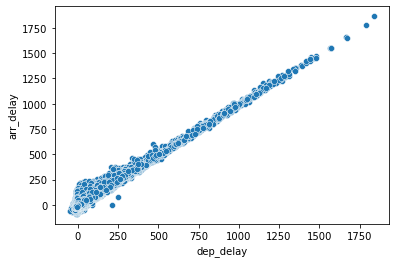

In [250]:
# correlation between dep_delay and arr_delay

sns.scatterplot(data=df, x = 'dep_delay', y= 'arr_delay')

dep_delay (Departure Delay) was removed from the dataset as its inclusion would result in biased models, since its correlation with arr_delay is high.
It is understood that if a plane is leaving late then its chances of arriving late to its destination will increase

### Dropping unwanted features

- **fl_date**: Flight Date (yyyy-mm-dd)
- **op_carrier_fl_num**: Flight Number
- **op_unique_carrier**: Unique Scheduled Operating Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users,for example, PA, PA(1), PA(2). Use this field for analysis across a range of years.
- **mkt_carrier**: Code assigned by IATA and commonly used to identify a carrier. As the same code may have been assigned to different carriers over time, the code is not always unique. For analysis, use the Unique Carrier Code.
- **branded_code_share**: Reporting Carrier Operated or Branded Code Share Partners
- **cancelled**: Cancelled Flight Indicator (1=Yes)
- **cancellation_code**: Specifies The Reason For Cancellation
- **carrier_delay**: Carrier Delay, in Minutes
- **weather_delay**: Weather Delay, in Minutes
- **nas_delay**: National Air System Delay, in Minutes
- **security_delay**: Security Delay, in Minutes
- **late_aircraft_delay**: Late Aircraft Delay, in Minutes
- **taxi_out**: Taxi Out Time, in Minutes
- **wheels_off**: Wheels Off Time (local time: hhmm)
- **wheels_on**: Wheels On Time (local time: hhmm)
- **taxi_in**: 	Taxi In Time, in Minutes
- **first_dep_time**: First Gate Departure Time at Origin Airport
- **total_add_gtime**: Total Ground Time Away from Gate for Gate Return or Cancelled Flight
- **longest_add_gtime**: Longest Time Away from Gate for Gate Return or Cancelled Flight
- **origin**: Origin Airport
- **dest**: Destination Airport
- **tail_num**: Tail Number
- **dup**: Duplicate flag marked Y if the flight is swapped based on Form-3A data
- **diverted**: Diverted Flight Indicator (1=Yes)
- **flights**: Number of Flights
- **distance**: Distance between airports (miles)
- **dep_delay**: Difference in minutes between scheduled and actual departure time. Early departures show negative numbers.	


- 'no_name'



In [223]:
# Dropping unwanted features

df.drop(['mkt_carrier', 'branded_code_share','cancelled', 'cancellation_code', 'carrier_delay', 'weather_delay', 
         'nas_delay',  'security_delay','late_aircraft_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 
        'no_name', 'first_dep_time','total_add_gtime', 'longest_add_gtime', 'origin', 'dest', 'tail_num', 'dup', 
        'diverted','flights', 'dep_delay', 'op_carrier_fl_num', 'op_unique_carrier', 'distance', 'fl_date'], 
        axis=1, inplace=True)

In [224]:
df.head()

,mkt_unique_carrier,mkt_carrier_fl_num,origin_airport_id,origin_city_name,dest_airport_id,dest_city_name,crs_dep_time,dep_time,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,month,date,year
0,AA,1924,13204,"Orlando, FL",11057,"Charlotte, NC",500,458,638,626,-12,98,88,69,1,3,2018
1,AA,1925,13303,"Miami, FL",13204,"Orlando, FL",2245,207,2355,309,194,70,62,36,1,3,2018
2,AA,1926,13204,"Orlando, FL",13303,"Miami, FL",630,631,739,755,16,69,84,51,1,3,2018
3,AA,1927,14307,"Providence, RI",11057,"Charlotte, NC",755,750,1032,1012,-20,157,142,118,1,3,2018
4,AA,1928,11057,"Charlotte, NC",14307,"Providence, RI",1150,1146,1354,1339,-15,124,113,90,1,3,2018


In [225]:
df['mkt_unique_carrier'].replace({
    'AA': 0,
    'DL': 1,
    'UA': 2,
    'AS': 3,
    'WN': 4,
    'B6': 5,
    'HA': 6,
    'F9': 7,
    'NK': 8,
    'G4': 9
    
}, inplace = True)

In [226]:
df.head()

,mkt_unique_carrier,mkt_carrier_fl_num,origin_airport_id,origin_city_name,dest_airport_id,dest_city_name,crs_dep_time,dep_time,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,month,date,year
0,0,1924,13204,"Orlando, FL",11057,"Charlotte, NC",500,458,638,626,-12,98,88,69,1,3,2018
1,0,1925,13303,"Miami, FL",13204,"Orlando, FL",2245,207,2355,309,194,70,62,36,1,3,2018
2,0,1926,13204,"Orlando, FL",13303,"Miami, FL",630,631,739,755,16,69,84,51,1,3,2018
3,0,1927,14307,"Providence, RI",11057,"Charlotte, NC",755,750,1032,1012,-20,157,142,118,1,3,2018
4,0,1928,11057,"Charlotte, NC",14307,"Providence, RI",1150,1146,1354,1339,-15,124,113,90,1,3,2018


In [ ]:
df['origin_city_name'].unique()

In [ ]:
df['arr_delay'].describe()

# Trial with limited features

In [228]:
# Making a new copy of the dataframe df

df_clean_data = df.copy()

In [229]:
# copy month feature for one-hot encoded Month

df_month = df_clean_data['month']

# dropping columns mkt_unique_carrier	mkt_carrier_fl_num	origin_airport_id	origin_city_name	
# dest_airport_id	dest_city_name	year, month

df_clean_data.drop(['mkt_unique_carrier', 'mkt_carrier_fl_num', 'origin_airport_id', 
                    'origin_city_name', 'dest_airport_id', 'dest_city_name', 'year', 'date', 'month'], axis = 1, inplace = True)

df_clean_data.head(5)


,crs_dep_time,dep_time,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time
0,500,458,638,626,-12,98,88,69
1,2245,207,2355,309,194,70,62,36
2,630,631,739,755,16,69,84,51
3,755,750,1032,1012,-20,157,142,118
4,1150,1146,1354,1339,-15,124,113,90


In [230]:
df_clean_data.isnull().sum()

crs_dep_time           0
dep_time               0
crs_arr_time           0
arr_time               0
arr_delay              0
crs_elapsed_time       0
actual_elapsed_time    0
air_time               0
dtype: int64

In [231]:
# Data Standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_data_scaled = pd.DataFrame(scaler.fit_transform(df_clean_data.astype(float)),
                                   columns=df_clean_data.columns)

In [232]:
df_data_scaled

,crs_dep_time,dep_time,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time
0,-1.701170,-1.761674,-1.661234,-1.581383,-0.374390,-0.580672,-0.637655,-0.568257
1,1.874229,-2.261470,1.684097,-2.173469,3.143865,-0.957770,-0.991054,-1.030627
2,-1.434808,-1.417194,-1.464449,-1.340439,0.103819,-0.971238,-0.692024,-0.820458
3,-1.178691,-1.180239,-0.893580,-0.860419,-0.511021,0.213926,0.096328,0.118293
4,-0.369360,-0.391717,-0.266209,-0.249655,-0.425627,-0.230510,-0.297848,-0.274021
...,...,...,...,...,...,...,...,...
99995,0.452265,0.410744,0.819026,0.829922,-0.066970,3.217241,3.440030,3.438949
99996,-1.424563,-1.427150,-0.088908,-0.090894,-0.528100,2.274496,2.216724,2.304041
99997,-1.215571,-1.218072,-1.102055,-1.028520,-0.220680,-0.445995,-0.325033,-0.231988
99998,-0.645966,-0.646593,-0.753299,-0.682980,-0.118207,-1.240593,-1.167754,-1.002604


In [233]:
# Creating dummy variable for month feature

month_dummy = pd.get_dummies(df_month.astype(str), drop_first=True)
month_dummy.shape

(100000, 0)

In [236]:
# concatinating month_dummy with the scaled data

df_data_scaled = pd.concat([df_data_scaled, month_dummy], axis=1)
df_data_scaled.head()

,crs_dep_time,dep_time,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time
0,-1.701170,-1.761674,-1.661234,-1.581383,-0.374390,-0.580672,-0.637655,-0.568257
1,1.874229,-2.261470,1.684097,-2.173469,3.143865,-0.957770,-0.991054,-1.030627
2,-1.434808,-1.417194,-1.464449,-1.340439,0.103819,-0.971238,-0.692024,-0.820458
3,-1.178691,-1.180239,-0.893580,-0.860419,-0.511021,0.213926,0.096328,0.118293
4,-0.369360,-0.391717,-0.266209,-0.249655,-0.425627,-0.230510,-0.297848,-0.274021


In [277]:
# Dimensional Reductionality
from sklearn.decomposition import PCA

n_components = 2
pca = PCA(n_components=n_components)
components = pca.fit_transform(df_data_scaled)
labels = {
    str(i): f'PC {i+1} ({var:.1f}%)'
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}


total_var = pca.explained_variance_ratio_.sum() * 100
print(f'Total Explained Variance: {total_var:.2f}%')

labels

Total Explained Variance: 77.26%


{'0': 'PC 1 (40.1%)', '1': 'PC 2 (37.2%)'}

In [168]:
#Feature Selection
#split dataset into features and target variable

X = df_data_scaled.drop(['arr_delay'], axis = 1)
y = df_data_scaled['arr_delay']

In [169]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) # 70% training and 30% test

In [170]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((70000, 7), (30000, 7))

In [269]:
from sklearn.linear_model import LinearRegression, Ridge
# import MAE from sklearn
from sklearn.metrics import mean_absolute_error

# Baseline Model, fit and predict linear regression

lr = LinearRegression()
lr.fit(X_train,y_train)
y_lr = lr.predict(X_train)

print("LR-MAE for the Training set: ",mean_absolute_error(y_train, y_lr))

LR-MAE for the Training set:  0.4300682303875301


In [263]:
# Predicting using the test set

y_test_lr = lr.predict(X_test)
print("MAE for the test set: ", mean_absolute_error(y_test, y_test_lr))

MAE for the test set:  0.4310990832056329


In [268]:
# creating ridge regression
rr = Ridge(alpha=0.1)
rr.fit(X_train,y_train)
y_rr = rr.predict(X_train)
print("RR-MAE for the Training set: ",mean_absolute_error(y_train, y_rr))

RR-MAE for the Training set:  0.43006874835295855


In [267]:
# According to MAE, what is the better model?

if mean_absolute_error(y_train, y_lr) < mean_absolute_error(y_train, y_rr):
    print("Linear Regression is better")
else:
    print("Ridge Regression is better")

Linear Regression is better


In [270]:
# import r2_score from sklearn
from sklearn.metrics import r2_score

print("LR-R2 Score for the Training set: ",r2_score(y_train, y_lr)) # linear Regression

LR-R2 Score for the Training set:  0.10346005186604779


In [271]:
print("RR-R2 Score for the Training set: ",r2_score(y_train, y_rr)) # ridge regression

RR-R2 Score for the Training set:  0.10346005142469783


In [273]:
# Gridsearch

#Use grid_search to find the best value of the parameter alpha for Ridge and Lasso regressions

from sklearn.model_selection import GridSearchCV

In [274]:
#define possible alphas
param_grid = [{'alpha': [0.0001, 0.001, 0.01, 0.1]}]

#create gridsearch object
gridsearch_obj = GridSearchCV(estimator=rr, scoring='r2', param_grid=param_grid, n_jobs=-1)

#save fit to training data set
rr_fit = gridsearch_obj.fit(X_train, y_train)

# View the accuracy score
print('Training score for Ridge:', gridsearch_obj.best_score_) 
print('Best alpha for Ridge:', gridsearch_obj.best_estimator_.alpha)


Training score for Ridge: 0.10178422594779682
Best alpha for Ridge: 0.1
